In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"junedsm","key":"b8a9846535b5712c18871f18ff354a86"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [00:41<00:00, 104MB/s] 
100% 3.58G/3.58G [00:41<00:00, 93.2MB/s]


In [ ]:
!unzip -q fruits-fresh-and-rotten-for-classification.zip


In [ ]:
TRAIN_PATH = '/content/dataset/train'
TEST_PATH = '/content/dataset/test'
SIZE = (240, 240)


In [ ]:
import os
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['freshoranges', 'freshapples', 'rottenoranges', 'freshbanana', 'rottenbanana', 'rottenapples']


Print number of images for each class

In [ ]:
##train dataset
#fresh
fresh_apples_train_dir = os.path.join(TRAIN_PATH, 'freshapples')
fresh_banana_train_dir = os.path.join(TRAIN_PATH, 'freshbanana')
fresh_oranges_train_dir = os.path.join(TRAIN_PATH, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(TRAIN_PATH, 'rottenapples')
rotten_banana_train_dir = os.path.join(TRAIN_PATH, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(TRAIN_PATH, 'rottenoranges')



In [ ]:
##test dataset

#fresh
fresh_apples_test_dir = os.path.join(TEST_PATH, 'freshapples')
fresh_banana_test_dir = os.path.join(TEST_PATH, 'freshbanana')
fresh_oranges_test_dir = os.path.join(TEST_PATH, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(TEST_PATH, 'rottenapples')
rotten_banana_test_dir = os.path.join(TEST_PATH, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(TEST_PATH, 'rottenoranges')

In [ ]:
fresh_apples_train_len=len(os.listdir(fresh_apples_train_dir))
fresh_banana_train_len=len(os.listdir(fresh_banana_train_dir))
fresh_oranges_train_len=len(os.listdir(fresh_oranges_train_dir))
rotten_apples_train_len=len(os.listdir(rotten_apples_train_dir))
rotten_banana_train_len=len(os.listdir(rotten_banana_train_dir))
rotten_oranges_train_len=len(os.listdir(rotten_oranges_train_dir))

# Train Dataset

print("Images of Training Dataset")
print("No. of train fresh apple images : ", fresh_apples_train_len)
print("No. of train fresh banana images : ", fresh_banana_train_len)
print("No. of train fresh orange images : ", fresh_oranges_train_len)
print("No. of train rotten apple images : ", rotten_apples_train_len)
print("No. of train rotten banana images : ", rotten_banana_train_len)
print("No. of train rotten orange images : ", rotten_oranges_train_len)

Images of Training Dataset
No. of train fresh apple images :  1693
No. of train fresh banana images :  1581
No. of train fresh orange images :  1466
No. of train rotten apple images :  2342
No. of train rotten banana images :  2224
No. of train rotten orange images :  1595


In [ ]:
# Test Dataset

print("Images of Testing Dataset")
print("No. of test fresh apple images : ", len(os.listdir(fresh_apples_test_dir)))
print("No. of test fresh banana images : ", len(os.listdir(fresh_banana_test_dir)))
print("No. of test fresh orange images : ", len(os.listdir(fresh_oranges_test_dir)))
print("No. of test rotten apple images : ", len(os.listdir(rotten_apples_test_dir)))
print("No. of test rotten banana images : ", len(os.listdir(rotten_banana_test_dir)))
print("No. of test rotten orange images : ", len(os.listdir(rotten_oranges_test_dir)))


Images of Testing Dataset
No. of test fresh apple images :  395
No. of test fresh banana images :  381
No. of test fresh orange images :  388
No. of test rotten apple images :  601
No. of test rotten banana images :  530
No. of test rotten orange images :  403


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="validation",
                                                 class_mode='categorical')


Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


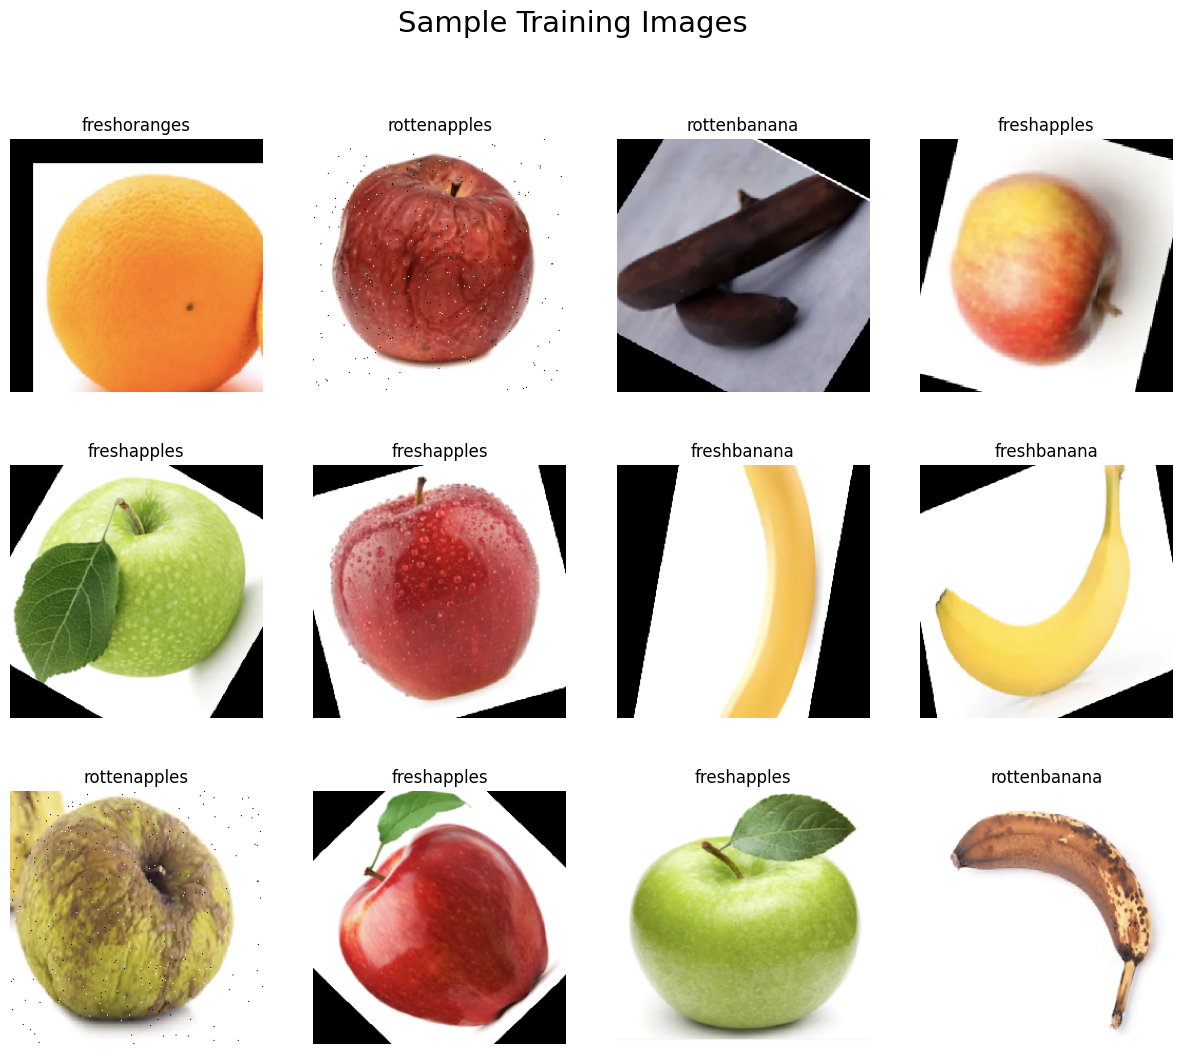

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

Define a function to show an image and its size

In [ ]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    print("the size of a image",image.shape)
    plt.imshow(image)

the size of a image (402, 380, 3)


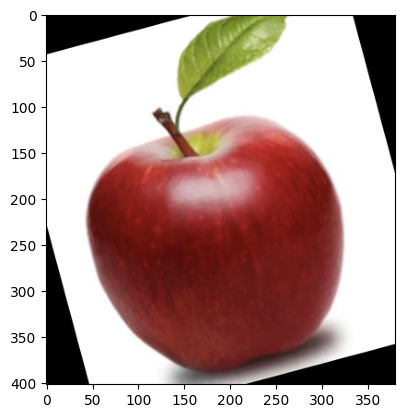

In [ ]:
import matplotlib.image as mpimg
#Fresh example:
show_image('/content/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.11.41 PM.png')

the size of a image (418, 438, 3)


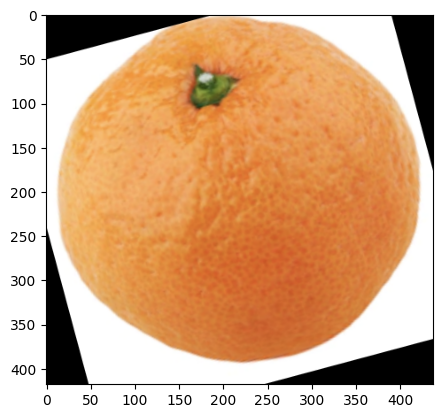

In [ ]:
#Rotten example:
show_image('/content/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.22.58 PM.png')

Sequential model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0

In [ ]:
history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])

<ipython-input-19-73159a7ff246>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])


Epoch 1/12
307/307 [==============================] - 71s 191ms/step - loss: 0.9675 - accuracy: 0.6398 - val_loss: 0.5113 - val_accuracy: 0.8162
Epoch 2/12
307/307 [==============================] - 58s 189ms/step - loss: 0.3607 - accuracy: 0.8729 - val_loss: 0.2623 - val_accuracy: 0.9219
Epoch 3/12
307/307 [==============================] - 62s 201ms/step - loss: 0.2420 - accuracy: 0.9112 - val_loss: 0.3154 - val_accuracy: 0.8925
Epoch 4/12
307/307 [==============================] - 61s 199ms/step - loss: 0.1784 - accuracy: 0.9346 - val_loss: 0.1578 - val_accuracy: 0.9403
Epoch 5/12
307/307 [==============================] - 59s 193ms/step - loss: 0.1393 - accuracy: 0.9497 - val_loss: 0.1204 - val_accuracy: 0.9559
Epoch 6/12
307/307 [==============================] - 62s 202ms/step - loss: 0.1100 - accuracy: 0.9602 - val_loss: 0.1376 - val_accuracy: 0.9540
Epoch 7/12
307/307 [==============================] - 63s 204ms/step - loss: 0.1026 - accuracy: 0.9633 - val_loss: 0.1582 - val_ac

Accuracy VS Validation Accuracy

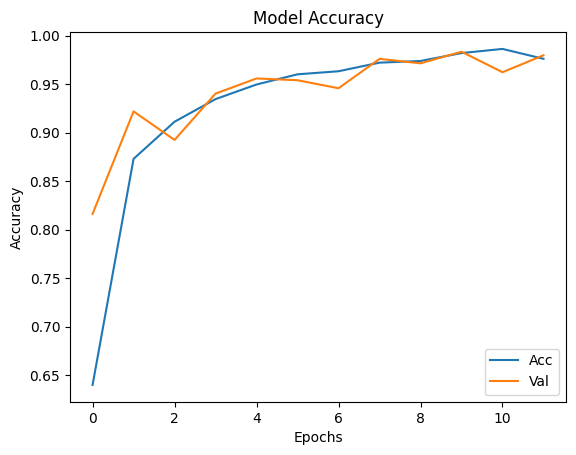

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

Loss VS Validation Loss

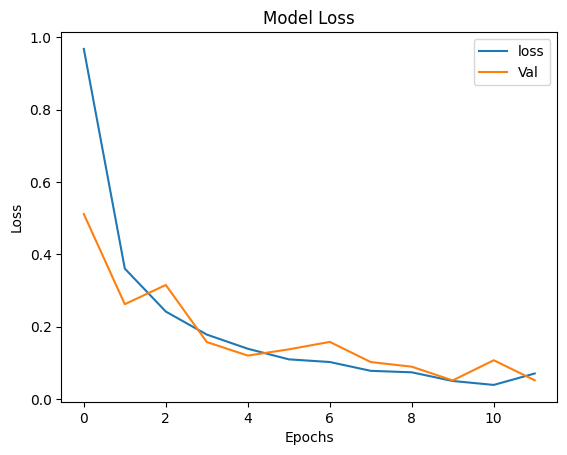

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 6 classes.
2698/2698 [==============================] - 19s 7ms/step - loss: 0.0915 - accuracy: 0.9678
accuracy test:  0.9677538871765137
loss test:  0.09149060398340225


Prediction

In [ ]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]

2698/2698 [==============================] - 17s 6ms/step


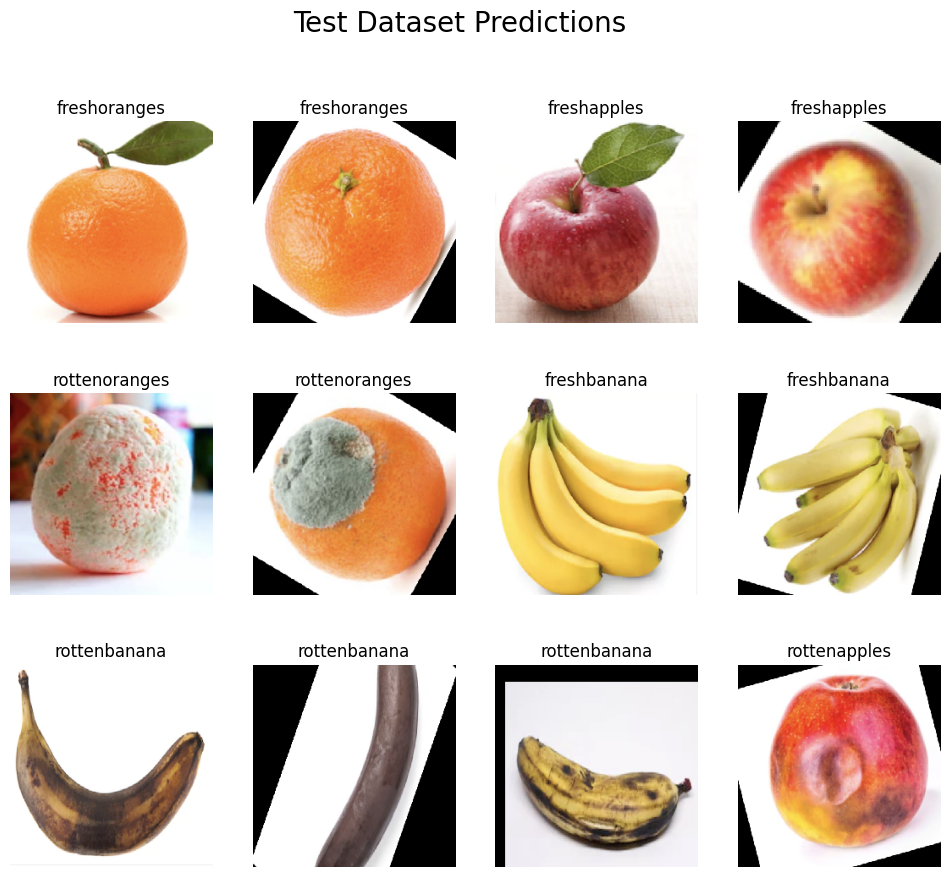

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
#saving model
model.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16

In [ ]:
import keras
model_vgg16 = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False);

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_vgg16.trainable = False

In [ ]:

# Add custom  layers
x = model_vgg16.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x) # You can adjust the number of units as needed
x = Dropout(0.5)(x) # Optional dropout layer for regularization
predictions = Dense(6, activation='softmax')(x)


In [ ]:
# Create a new model with custom top layers
model_vgg16 = Model(inputs=model_vgg16.input, outputs=predictions)

In [ ]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_vgg16.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model_vgg16.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])

<ipython-input-32-caff14242180>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg16.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])


Epoch 1/12
307/307 [==============================] - 73s 214ms/step - loss: 0.8644 - accuracy: 0.8190 - val_loss: 0.0951 - val_accuracy: 0.9752
Epoch 2/12
307/307 [==============================] - 64s 209ms/step - loss: 0.1962 - accuracy: 0.9273 - val_loss: 0.0822 - val_accuracy: 0.9743
Epoch 3/12
307/307 [==============================] - 62s 202ms/step - loss: 0.1512 - accuracy: 0.9438 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 4/12
307/307 [==============================] - 62s 202ms/step - loss: 0.1275 - accuracy: 0.9551 - val_loss: 0.0631 - val_accuracy: 0.9789
Epoch 5/12
307/307 [==============================] - 61s 198ms/step - loss: 0.1276 - accuracy: 0.9536 - val_loss: 0.0392 - val_accuracy: 0.9825
Epoch 6/12
307/307 [==============================] - 62s 200ms/step - loss: 0.1104 - accuracy: 0.9593 - val_loss: 0.0350 - val_accuracy: 0.9917
Epoch 7/12
307/307 [==============================] - 61s 199ms/step - loss: 0.0924 - accuracy: 0.9666 - val_loss: 0.0359 - val_ac

Accuracy VS Validation Accuracy

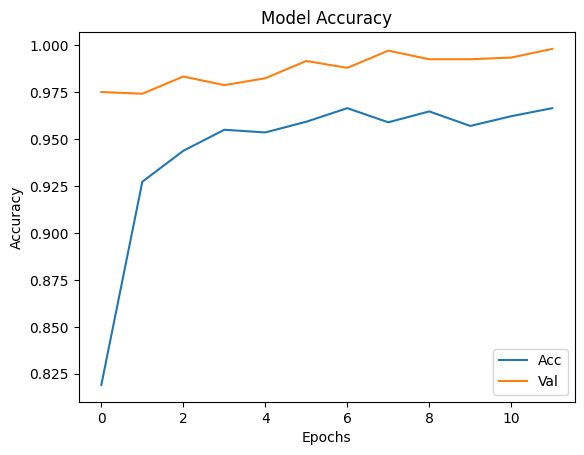

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

Loss VS Validation Loss

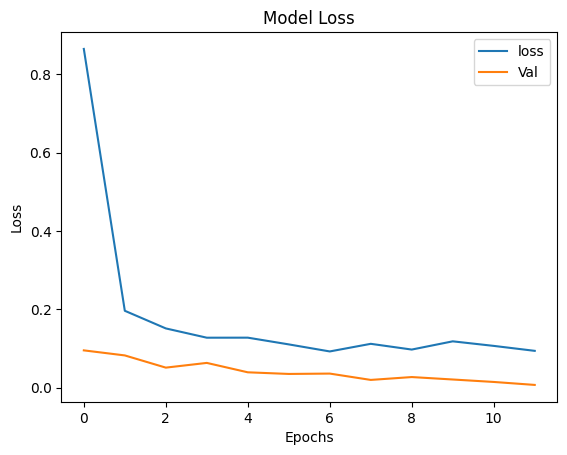

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [ ]:
filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model_vgg16.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

2698/2698 [==============================] - 32s 12ms/step - loss: 0.0344 - accuracy: 0.9867
accuracy test:  0.9866567850112915
loss test:  0.03443390503525734


In [ ]:
#saving model
model_vgg16.save("model2.h5")

ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
# Model 3: ResNet50
model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) # Adjust input shape as needed
for layer in model_resnet50.layers:
    layer.trainable = False # Freeze layers


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Load the ResNet50 model without the top layer (include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# Create a new model on top of the ResNet50 backbone
model_resnet50 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(6, activation='softmax')
])


In [ ]:
model_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_5 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 23600006 (90.03 MB)
Trainable params: 23546886 (89.82 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_resnet50.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model_resnet50.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])

<ipython-input-43-ad65584f197c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_resnet50.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset),callbacks=[early_stopping])


Epoch 1/12
307/307 [==============================] - 173s 434ms/step - loss: 0.3281 - accuracy: 0.9000 - val_loss: 37.2222 - val_accuracy: 0.2040
Epoch 2/12
307/307 [==============================] - 128s 417ms/step - loss: 0.1363 - accuracy: 0.9531 - val_loss: 1.6575 - val_accuracy: 0.2886
Epoch 3/12
307/307 [==============================] - 129s 420ms/step - loss: 0.0782 - accuracy: 0.9737 - val_loss: 2.0284 - val_accuracy: 0.6406
Epoch 4/12
307/307 [==============================] - 128s 418ms/step - loss: 0.0597 - accuracy: 0.9797 - val_loss: 0.0467 - val_accuracy: 0.9890
Epoch 5/12
307/307 [==============================] - 128s 417ms/step - loss: 0.0523 - accuracy: 0.9824 - val_loss: 7.0851 - val_accuracy: 0.4642
Epoch 6/12
307/307 [==============================] - 128s 418ms/step - loss: 0.0427 - accuracy: 0.9846 - val_loss: 0.0540 - val_accuracy: 0.9844
Epoch 7/12
307/307 [==============================] - 129s 420ms/step - loss: 0.0340 - accuracy: 0.9885 - val_loss: 0.1882 

Accuracy VS Validation Accuracy

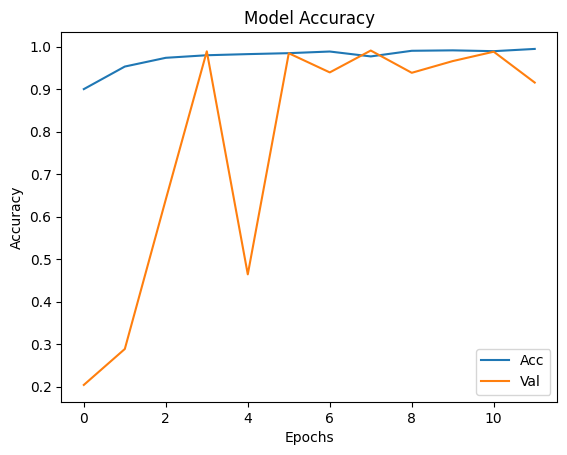

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

Loss VS Validation Loss

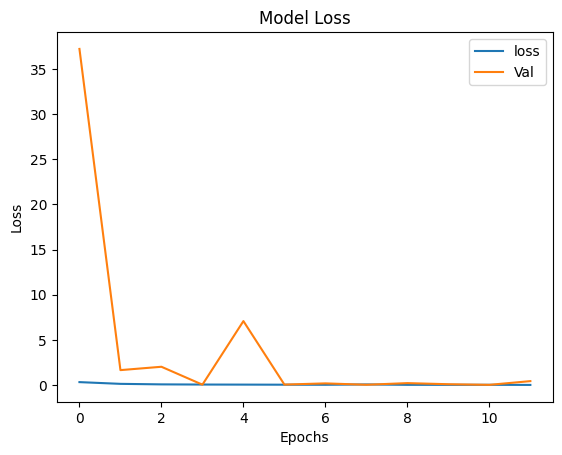

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [ ]:
filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model_resnet50.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

2698/2698 [==============================] - 34s 12ms/step - loss: 0.5062 - accuracy: 0.8973
accuracy test:  0.8973313570022583
loss test:  0.5061709880828857


In [ ]:
#saving model
model_resnet50.save("model3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

# Evaluate models
loss_resnet50, acc_resnet50 = model_resnet50.evaluate(test_generator, steps=nb_samples, verbose=1)
loss_model, acc_model = model.evaluate(test_generator, steps=nb_samples, verbose=1)
loss_vgg16, acc_vgg16 = model_vgg16.evaluate(test_generator, steps=nb_samples, verbose=1)



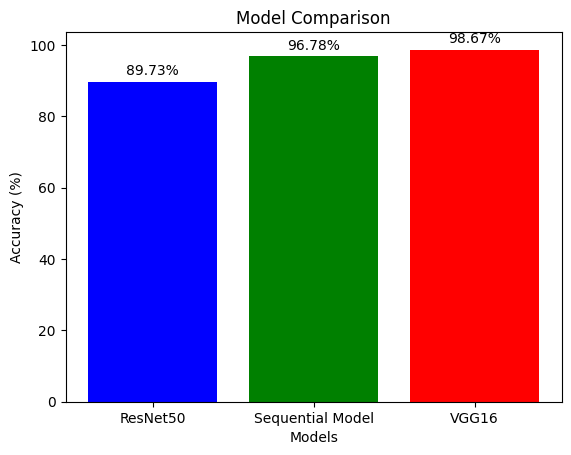

In [ ]:
acc_resnet50_percent = acc_resnet50 * 100
acc_model_percent = acc_model * 100
acc_vgg16_percent = acc_vgg16 * 100

# Create a list of model names and their respective accuracies
models = ['ResNet50', 'Sequential Model', 'VGG16']
accuracies = [acc_resnet50_percent, acc_model_percent, acc_vgg16_percent]

# Plot the accuracies
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')

# Show the accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()